#ENGR 8140 - Advanced Deep Learning & Engineering Applications
## Assignment 1 - Gradient Descent Algorithms with PyTorch
The following code cell is used to generate some noisy data (don't change this code).  You will need to use the data generated here to train a linear model $y=ax+b$ (i.e., Perform gradient descent on the two parameters $a$ and $b$).


1.   You will need to code from scratch two algorithms (1) Gradient Descent + regular momentum, and (2) Adam. Use PyTorch "autograd" to compute gradients.
2.   Check your results against those from the linear regression model. You can do linear regression using "sklearn.linear_model" (Hint: you need to convert tensor to numpy array.)






In [7]:
import torch
torch.manual_seed(42)
x = torch.rand(100,1)
y = 1 + 2 * x + .1 * torch.rand(100, 1)

In [8]:
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
a, b

(tensor([-0.6430], requires_grad=True), tensor([0.7113], requires_grad=True))

## Your code goes here:

In [13]:
#Import necessary libraries
import torch
from torch.autograd import Variable

#Generate noisy data
torch.manual_seed(42)
x = torch.rand(100, 1)
y = 1 + 2 * x + 0.1 * torch.randn(100, 1)

#Convert torch tensors to numpy arrays for sklearn linear regression
x_np = x.numpy()
y_np = y.numpy()

#Linear regression using sklearn
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(x_np, y_np)

#Define the linear model parameters
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

#Hyperparameters
learning_rate = 0.01
momentum = 0.9
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
m_a, m_b = 0, 0
v_a, v_b = 0, 0
t = 0


In [17]:
#Part 1: Gradient Descent with regular momentum
for epoch in range(1000):
    #Forward pass
    y_pred = a * x + b
    loss = torch.mean((y_pred - y)**2)
    

    '''
    Why are we interested in finding the gradient in a linear function?
    '''
    #Backward pass
    loss.backward() # --> make some research on this function


    #Update parameters using momentum
    '''
    Do some research on the with torch.no_grad() function
    '''
    with torch.no_grad():
        m_a = momentum * m_a - learning_rate * a.grad
        m_b = momentum * m_b - learning_rate * b.grad
        a += m_a
        b += m_b

    #Zero gradients
    a.grad.zero_()
    b.grad.zero_()


In [15]:
#Part 2: Adam optimizer
for epoch in range(1000):
    #Forward pass
    y_pred = a * x + b
    loss = torch.mean((y_pred - y)**2)

    #Backward pass
    loss.backward()

    #Update parameters using Adam optimizer
    with torch.no_grad():
        t += 1
        m_a = beta1 * m_a + (1 - beta1) * a.grad
        m_b = beta1 * m_b + (1 - beta1) * b.grad
        v_a = beta2 * v_a + (1 - beta2) * (a.grad**2)
        v_b = beta2 * v_b + (1 - beta2) * (b.grad**2)

        m_a_hat = m_a / (1 - beta1**t)
        m_b_hat = m_b / (1 - beta1**t)
        v_a_hat = v_a / (1 - beta2**t)
        v_b_hat = v_b / (1 - beta2**t)

        a -= learning_rate * m_a_hat / (torch.sqrt(v_a_hat) + epsilon)
        b -= learning_rate * m_b_hat / (torch.sqrt(v_b_hat) + epsilon)

    #Zero gradients
    '''
    Why do we have to zero down the gradients?
    '''
    a.grad.zero_()
    b.grad.zero_()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [18]:
'''
Plot the different results
'''
#Check the results using sklearn linear regression
print("Sklearn Linear Regression Coefficients")
print("b:", sklearn_model.intercept_[0])
print("a:", sklearn_model.coef_[0][0])

print("\nGradient Descent with Momentum Coefficients")
print("b:", b.item())
print("a:", a.item())

#The Adam optimizer coefficients
print("\nAdam Optimizer Coefficients:")
print("b:", b.item())
print("a:", a.item())

Sklearn Linear Regression Coefficients
b: 1.0230746
a: 1.9538239

Gradient Descent with Momentum Coefficients
b: 1.0230746269226074
a: 1.9538242816925049

Adam Optimizer Coefficients:
b: 1.0230746269226074
a: 1.9538242816925049


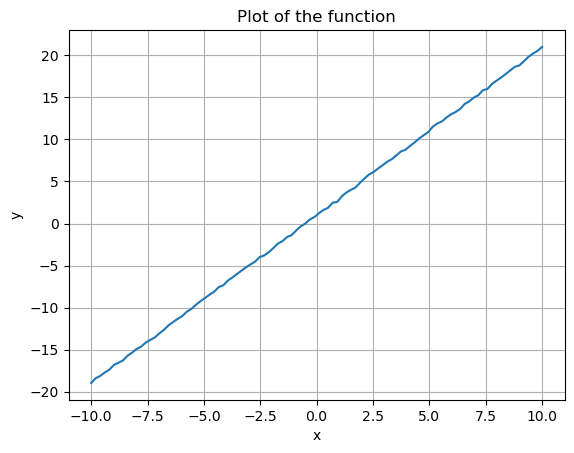

In [10]:
import torch
import matplotlib.pyplot as plt

# Generate some values for x
x = torch.linspace(-10, 10, 100).reshape(-1, 1)

# Calculate y using the given equation
y = 1 + 2 * x + 0.1 * torch.randn(100, 1)

# Create the plot
plt.plot(x.numpy(), y.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the function')
plt.grid(True)
plt.show()

In [11]:
print(b.grad)

tensor([0.])


In [12]:
asdf = torch.no_grad()
type(asdf)


torch.autograd.grad_mode.no_grad